In [13]:
from ipynb.fs.full.evaluation import *
from ipynb.fs.full.Data_Processing import *
from numpy import concatenate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section focuses on visualising the data for: 

- class distribution
- correlations within the data
- PCA component analysis 
- EEG topography plots
- noisy and filtered data

### 1) Visualising the class distribution 

#### a) All Users

In [29]:
# first load the data 

saved_file = "/cs/home/ybk1/Dissertation/data/all_tests_EEG.pickle"
all_tests = load_file(saved_file)

test_list = []
for user in all_tests:
    test_list.append(all_tests[user])

df = pd.concat(test_list)

at_freq_dist = df['attention'].value_counts()
in_freq_dist = df['interest'].value_counts()
ef_freq_dist = df['effort'].value_counts()
label_freq = [at_freq_dist, in_freq_dist , ef_freq_dist]
classes = [at_freq_dist.index, in_freq_dist.index , ef_freq_dist.index]
titles = ["attention","interest", "effort"]

(3.0    681316
 4.0    660825
 2.0    564632
 5.0    454494
 1.0    199242
 Name: attention, dtype: int64,
 4.0    719101
 3.0    548611
 5.0    536476
 2.0    535363
 1.0    220958
 Name: interest, dtype: int64,
 2.0    954542
 1.0    535866
 3.0    513200
 4.0    375599
 5.0    181302
 Name: effort, dtype: int64)

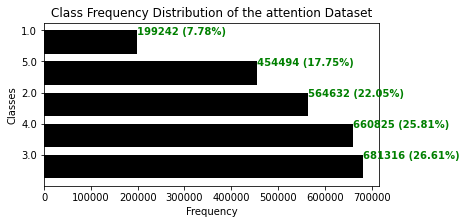

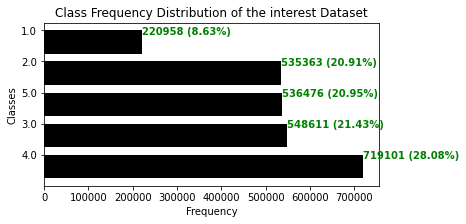

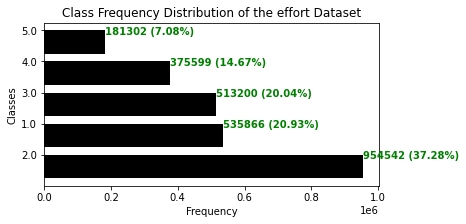

In [28]:
def get_pct(array, value):
    """
    Gets the percentage of a value in proportion to the sum of an array
    return: pct_string
    """
    pct = value/array.sum()
    pct_string =  " ({:.2%})".format(pct)
    return pct_string
#
def plot_class_dist(data, classes, title):
    """
    Plots a 2-D plot, showing the relationship between classes and frequency
    Plots the images seen in Figure 2 of the report. 
    """
    fig, ax = plt.subplots(figsize=(6, 3))    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    ax.barh(ind, data, width, color="black")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(classes, minor=False)
    plt.title("Class Frequency Distribution of the " + title +  " Dataset")
    plt.xlabel('Frequency')
    plt.ylabel('Classes')
    for i, v in enumerate(data):
        ax.text(v + 3, i + .25, str(v) + get_pct(data,v), color='green', fontweight='bold')
    plt.show()

for i in range(3):
    plot_class_dist(label_freq[i],classes[i],titles[i])

From the above frequency distribution plots, we can see that there is significant cases of class imbalance for each of the labels. The effort label experiences the largest degree
of class imbalance, where a score of 2 accounts for around 37% of the dataset, whilst scores of 5 only account for 7%. 